<a href="https://colab.research.google.com/github/sanchesprogramer/Inteligencia-Artificial/blob/main/Projeto/An%C3%A1lise%20explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raphael Dias Sanches RA: 10403418

Felipe de Almeida Parreira RA: 10400771

Gabriel William Ribeiro Pauleti RA: 10400878

Davi de Carvalho Sampaio RA: 10428169

In [31]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Base.csv", sep = ";")

In [33]:
dataset = dataset.drop(columns=['RADIACAO GLOBAL (Kj/m²)']) #Não será levado em consideração a radiação global nesse projeto
colunas_numericas = dataset.columns.difference(["Data", "Hora UTC"])
dataset[colunas_numericas] = dataset[colunas_numericas].astype(str).replace(",", ".", regex=True).astype(float)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        try:
            dataset[col] = pd.to_datetime(dataset[col])
        except:
            pass

<ipython-input-33-894af6cbe6fe>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col])


In [34]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2024,0000 UTC,0.0,1010.6,1010.2,19.6,14.4,20.5,19.6,14.4,13.8,72.0,65.0,72.0,123.0,6.5,1.5
1,01/01/2024,0100 UTC,0.0,1011.2,1010.6,19.0,14.4,19.6,19.0,14.4,14.0,75.0,70.0,75.0,137.0,5.3,2.1
2,01/01/2024,0200 UTC,0.0,1011.3,1011.1,18.6,14.6,19.0,18.6,14.7,14.4,78.0,75.0,78.0,121.0,4.6,1.9
3,01/01/2024,0300 UTC,0.0,1011.1,1010.4,18.8,14.9,18.9,18.6,14.9,14.6,79.0,77.0,78.0,119.0,5.0,1.6
4,01/01/2024,0400 UTC,0.0,1010.5,1010.1,18.9,14.9,19.2,18.8,15.0,14.7,78.0,75.0,77.0,114.0,5.2,1.5


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8746 entries, 0 to 8745
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Data                                              8746 non-null   object 
 1   Hora UTC                                          8746 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                  8746 non-null   float64
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   8746 non-null   float64
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  8746 non-null   float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)      8746 non-null   float64
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)              8746 non-null   float64
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)        8746 non-null   float64
 8   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)        8746 non-null   float64
 9   TEMPERATURA ORVALHO

In [36]:
dataset.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,0.238052,1009.847519,1009.256506,20.350960,16.050343,20.870947,19.870695,16.536611,15.617962,80.718843,75.431740,78.116396,153.747656,4.924354,1.464864
std,1.469494,5.295553,5.375816,5.603711,4.655168,5.758879,5.459374,4.645837,4.692184,13.487006,15.810303,14.786143,80.106005,2.572680,0.780496
min,0.000000,990.100000,988.900000,3.400000,-0.700000,3.500000,3.100000,0.100000,-1.800000,33.000000,26.000000,28.000000,1.000000,0.600000,0.100000
25%,0.000000,1006.300000,1005.700000,17.000000,13.500000,17.300000,16.600000,14.000000,13.000000,72.000000,64.000000,68.000000,103.000000,3.000000,0.900000
50%,0.000000,1009.400000,1008.800000,20.500000,16.800000,20.900000,20.100000,17.200000,16.300000,84.000000,79.000000,82.000000,129.000000,4.600000,1.300000
75%,0.000000,1013.000000,1012.500000,24.100000,19.400000,24.700000,23.600000,19.900000,19.000000,92.000000,89.000000,90.000000,193.000000,6.500000,1.900000
max,46.800000,1027.100000,1026.900000,36.700000,25.700000,37.300000,36.000000,25.800000,24.800000,97.000000,97.000000,97.000000,360.000000,25.000000,7.900000


In [37]:
dataset.isnull().sum()

,0
Data,0
Hora UTC,0
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),0
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",0
TEMPERATURA DO PONTO DE ORVALHO (°C),0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),0


In [38]:
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y')
dataset_filtrado = dataset[(dataset['Data'] >= "2024-04-01") & (dataset['Data'] <= "2024-05-31")]
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 2166 to 3611
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Data                                              1446 non-null   datetime64[ns]
 1   Hora UTC                                          1446 non-null   object        
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                  1446 non-null   float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   1446 non-null   float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  1446 non-null   float64       
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)      1446 non-null   float64       
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)              1446 non-null   float64       
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)        1446 non-null   float64       
 8   TEMPERATURA MÍNIMA NA HORA ANT

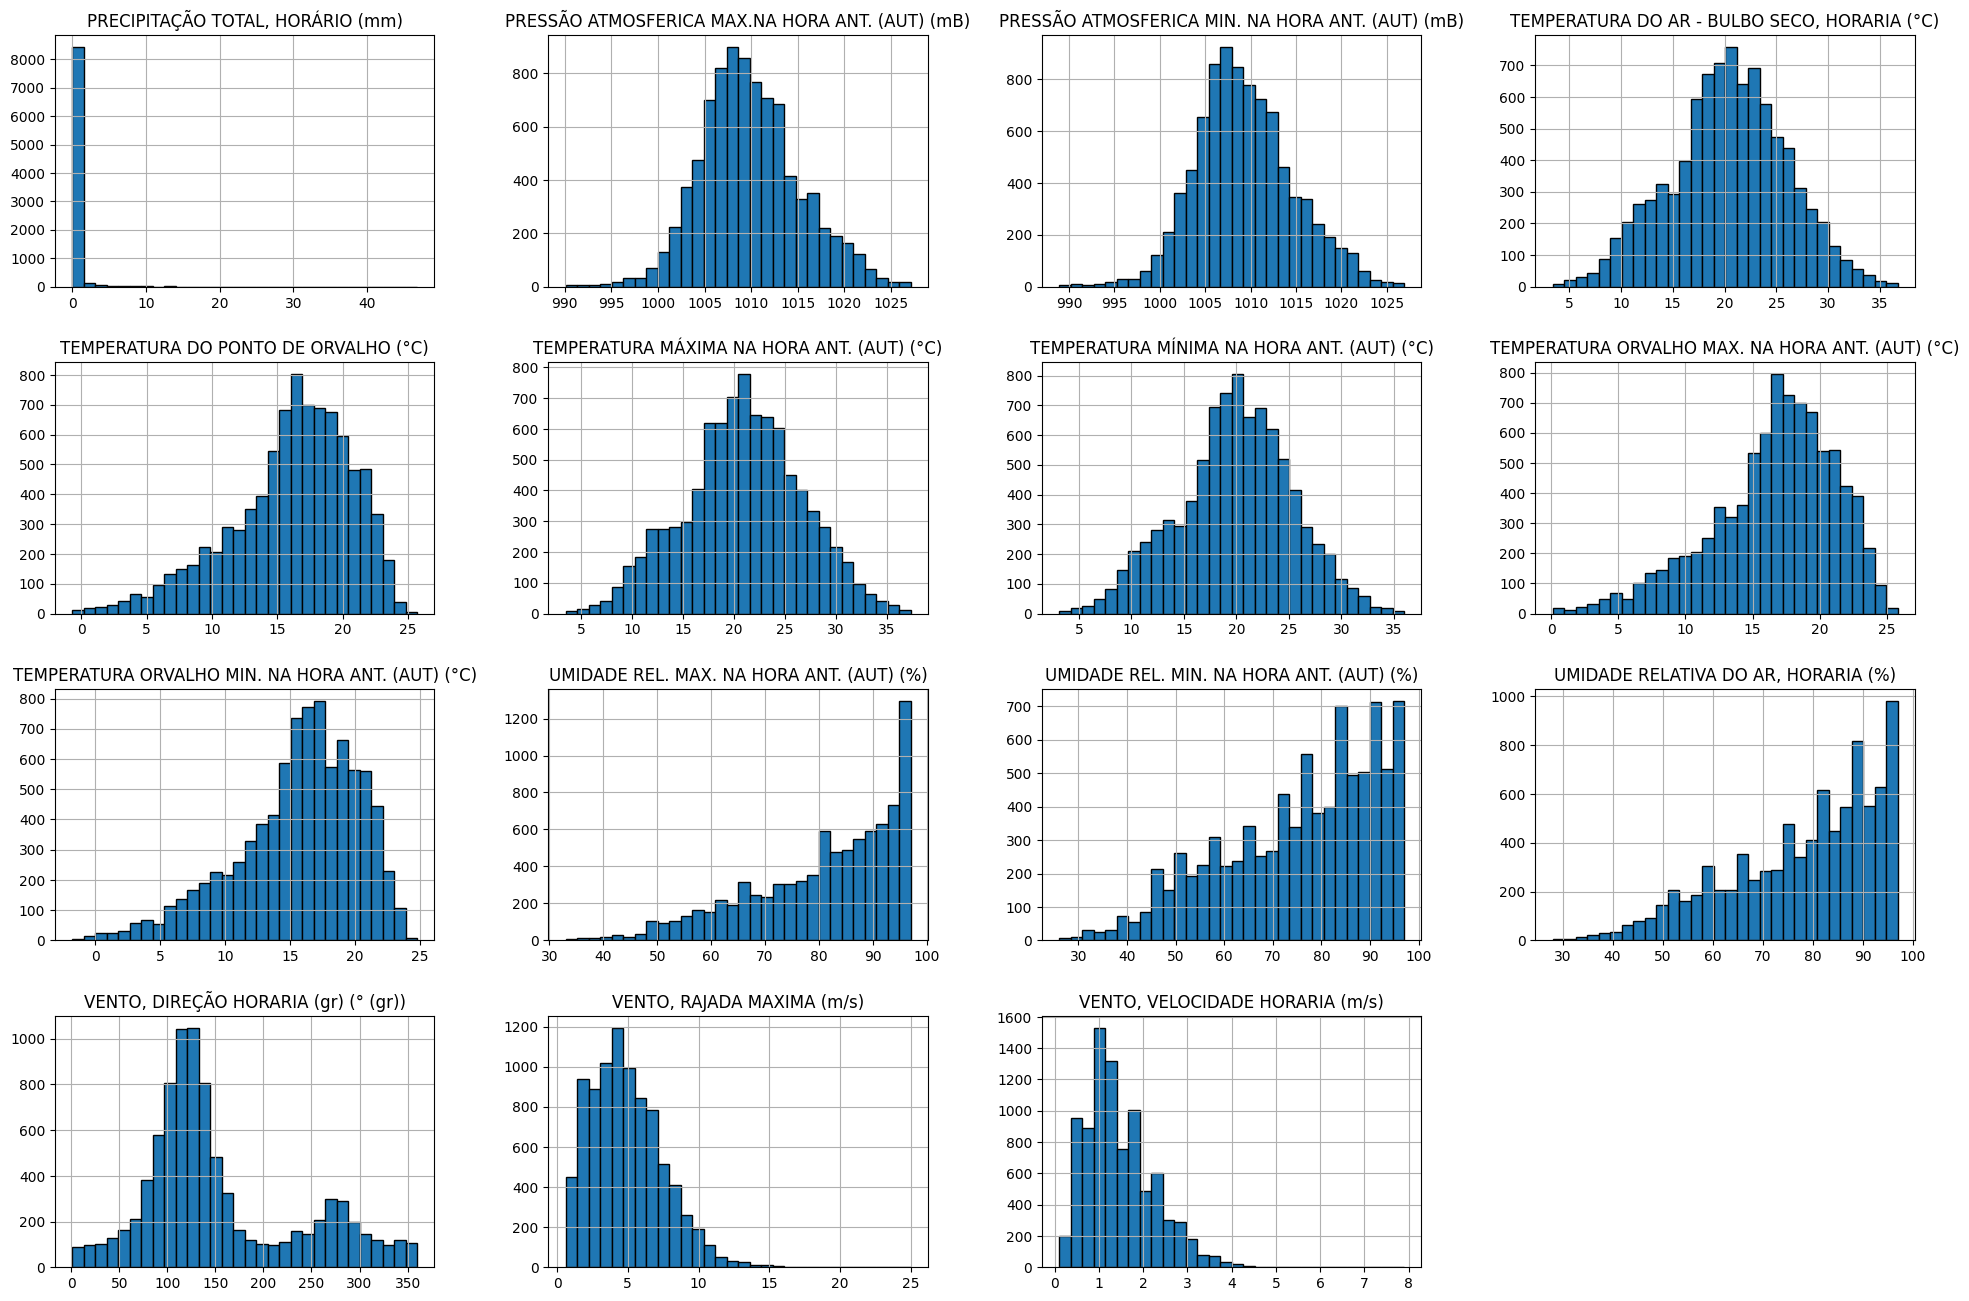

In [39]:
dataset.select_dtypes(include=['number']).hist(figsize=(24, 16), bins=30, edgecolor='black')
plt.show()

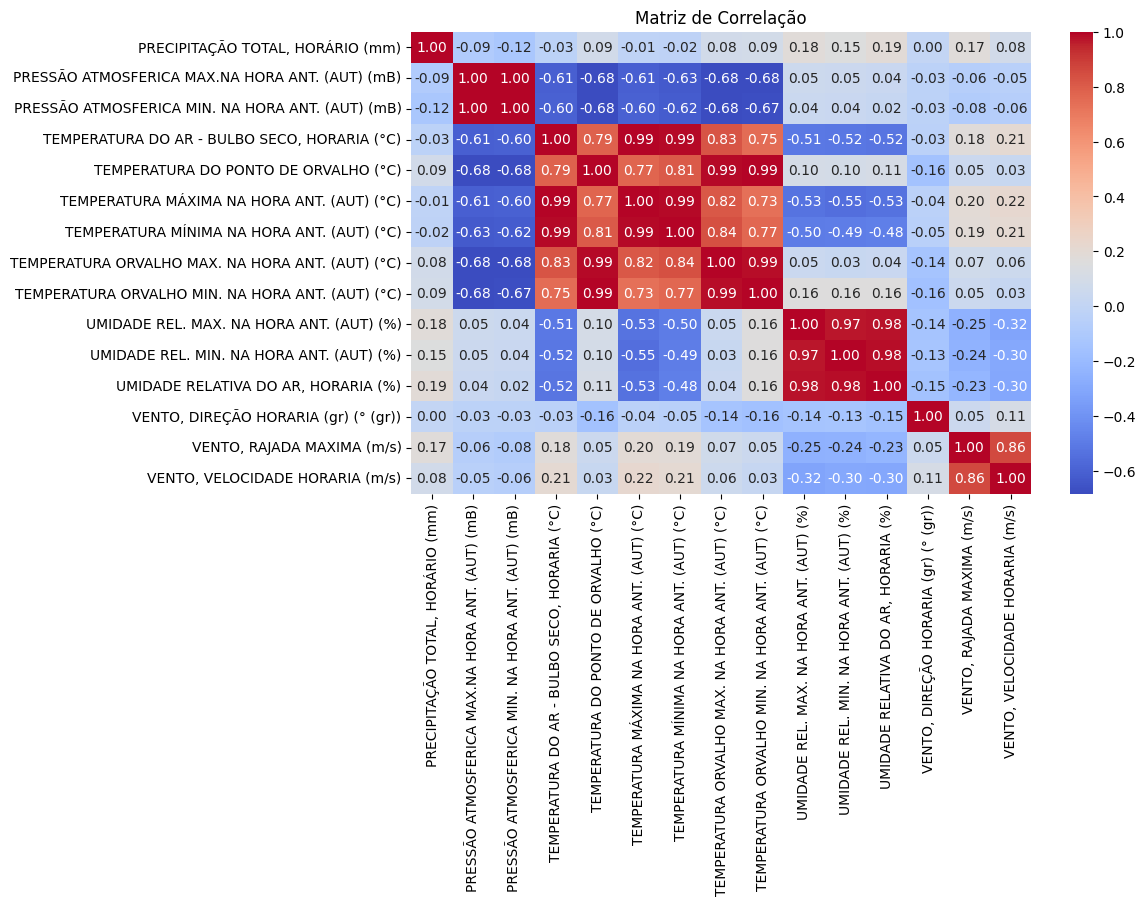

In [40]:
df_numerico = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()